# **Car Accident Fraud Prediction Analysis**  
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ Car Accident Fraud Prediction Analysis
```  

> **Project Type**

```
▶ Data EDA & Classification Prediction
Data Source: https://www.kaggle.com/competitions/2021-uofmn-travelers-modeling-competition/data
```

## **Project Introduction**
---

> **Scenario**

```
A car insurance company has experienced a surge in new registrations. However, along with this growth comes a concerning increase in fraudulent insurance claims.
```

> **Problem Definition**

```
▶ Rising number of fraudulent insurance claims.
```  


> **Expected Outcome**

```
▶ Reduction in fraudulent claim cases.
```

> **Proposed Solution**

```
▶ Identify high-risk claims with a high likelihood of fraud and conduct targeted re-evaluations to prevent fraudulent payouts
```

> **Performance Metric**  

```
▶ Compare the number of fraudulent cases before and after claim re-evaluation.
```

> **Operations**  

```
▶ Generate and load a predefined data mart on a monthly basis.
▶ Use the fraud detection model each month to extract claims with a high fraud probability.
▶ Prevent fraudulent transactions through re-evaluation and investigation.
```

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import pandas as pd
df = pd.read_csv('insurance_fraud.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


## **Process 1**  
- **Identify Meaningful Variables**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [5]:
print('df', df.shape)

df (17998, 25)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [7]:
print(df.isnull().sum())

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64


In [8]:
df = df.dropna(subset=['claim_est_payout', 'age_of_vehicle'])
df['marital_status'].fillna(0.0, inplace=True)
df['witness_present_ind'].fillna(0.0, inplace=True)

In [9]:
print(df.isnull().sum())

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64


In [10]:
df['fraud'].value_counts()

fraud
0    15161
1     2812
Name: count, dtype: int64

In [11]:
# Fraud Rate : 
2812 / (2812 + 15182)

0.15627431366010894

In [12]:
# numeric & categorical value
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [13]:
df[numeric_list]

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.452350,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.452180,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.181950,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.273440,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,1.0,93,42338,1,0,15012,0,0.0,99,0,4806.841803,6.0,32144.571850,16868.53410,0
17994,29996,35,0.0,22,35579,1,1,20111,1,0.0,94,1,4089.794471,3.0,9468.510601,31500.99689,1
17995,29997,27,1.0,81,32953,0,1,15012,2,0.0,1,1,2225.803056,5.0,64974.369590,44536.25506,0
17996,29999,52,1.0,86,39519,1,0,15026,1,1.0,75,1,9560.744844,3.0,24983.268110,50093.75959,0


## **Process 2**  
- **Explore Fraudulent Cases**  
---

### Numeric Variable
---

In [14]:
print("numeric_list :", numeric_list)

numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [15]:
df[numeric_list].head(5)

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.45235,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.45218,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.18195,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.27344,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.21122,25876.56319,0


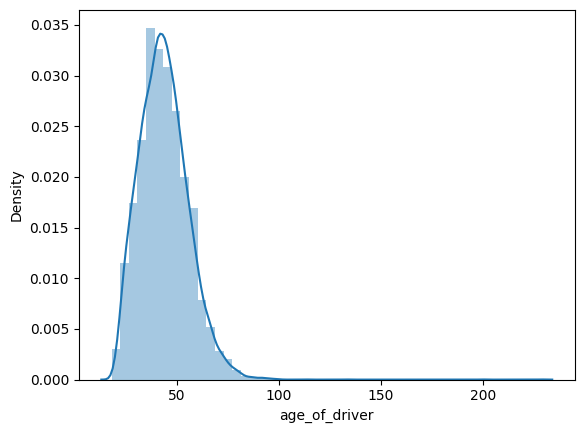

In [16]:
# age_of_driver distribution
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(df['age_of_driver']);

In [17]:
# segmentation
import numpy as np
df['age_of_driver_gp'] = np.where (df['age_of_driver'] <= 30, 1,
                           np.where(df['age_of_driver'] <= 50, 2, 3))

df[['age_of_driver','age_of_driver_gp']]

,age_of_driver,age_of_driver_gp
0,46,2
1,21,1
2,49,2
3,58,3
4,38,2
...,...,...
17993,69,3
17994,35,2
17995,27,1
17996,52,3


In [18]:
# fraud rate per segmentation
num_val='age_of_driver_gp'

# 1
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# 2
df_pivot = pd.pivot_table(df_tran,index = num_val,columns = 'fraud', values = 'claim_number')
# 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,age_of_driver_gp,0,1,ratio
0,1,2047,378,15.6
1,2,8838,1981,18.3
2,3,4276,453,9.6


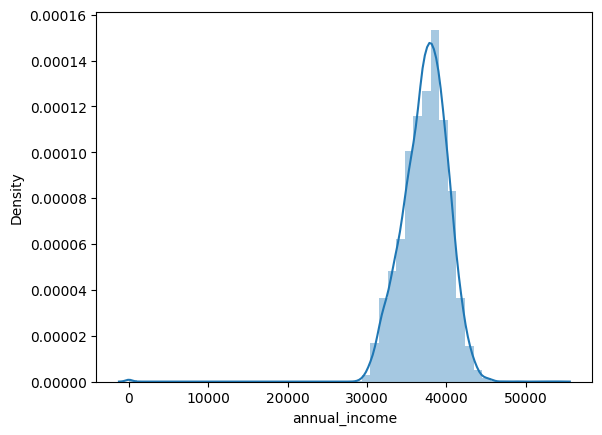

In [19]:
# annual_income distribution
sns.distplot(df['annual_income']);

In [20]:
# segmentation
import numpy as np
df['annual_income_gp'] = np.where (df['annual_income'] <= 35000, 1,
                           np.where(df['annual_income'] <= 40000, 2, 3))

df[['annual_income','annual_income_gp']]

,annual_income,annual_income_gp
0,38301,2
1,30445,1
2,38923,2
3,40605,3
4,36380,2
...,...,...
17993,42338,3
17994,35579,2
17995,32953,1
17996,39519,2


In [21]:
# fraud rate per segmentation
cat_val='annual_income_gp'

# 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# 2
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values = 'claim_number')
# 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,annual_income_gp,0,1,ratio
0,1,3134,592,15.9
1,2,9222,1911,17.2
2,3,2805,309,9.9


### Categorical Variable
---

In [22]:
df[categoical_list]

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,M,Rent,12/16/2016,Friday,Local,Broker,Compact,white
1,F,Rent,2/12/2015,Thursday,Highway,Online,Large,white
2,F,Own,12/6/2016,Tuesday,Local,Broker,Compact,white
3,F,Own,5/5/2016,Thursday,Local,Broker,Medium,other
4,M,Rent,10/27/2015,Tuesday,Highway,Broker,Medium,gray
...,...,...,...,...,...,...,...,...
17993,M,Own,3/28/2015,Saturday,Local,Broker,Medium,black
17994,F,Own,1/5/2015,Monday,Local,Phone,Medium,blue
17995,F,Rent,9/10/2016,Saturday,Local,Online,Medium,black
17996,F,Own,12/25/2015,Friday,Highway,Broker,Compact,white


In [23]:
df['claim_date'].head(5)

0    12/16/2016
1     2/12/2015
2     12/6/2016
3      5/5/2016
4    10/27/2015
Name: claim_date, dtype: object

In [24]:
# split date data 
df['year'] = df['claim_date'].apply(lambda x: x.split('/')[2])
df['month'] = df['claim_date'].apply(lambda x: x.split('/')[0])

df[['claim_date', 'year', 'month']]

,claim_date,year,month
0,12/16/2016,2016,12
1,2/12/2015,2015,2
2,12/6/2016,2016,12
3,5/5/2016,2016,5
4,10/27/2015,2015,10
...,...,...,...
17993,3/28/2015,2015,3
17994,1/5/2015,2015,1
17995,9/10/2016,2016,9
17996,12/25/2015,2015,12


In [25]:
print("categoical_list :", categoical_list)

categoical_list : ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']


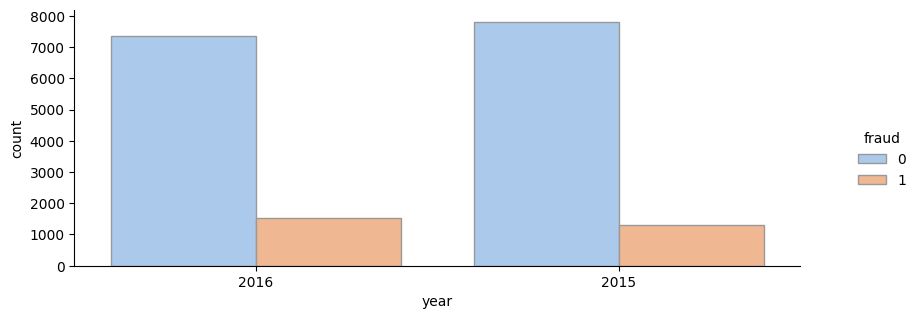

In [26]:
# fraud rate by year

sns.catplot(x="year", hue="fraud", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [27]:
#fraud rate per segmentation
cat_val='year'

# 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# 2
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values = 'claim_number')

# 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values(by=['ratio'], ascending = False)

,year,0,1,ratio
1,2016,7355,1520,17.1
0,2015,7806,1292,14.2


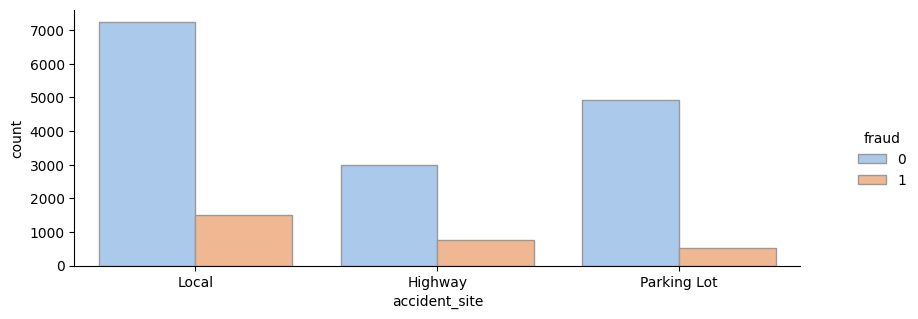

In [28]:
# fraud rate per accident site
sns.catplot(x="accident_site", hue="fraud", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [29]:
cat_val='accident_site'

# 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# 2
df_pivot = pd.pivot_table(df_tran, index = cat_val, columns = 'fraud', values = 'claim_number')

#3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values(by=['ratio'], ascending = False)

,accident_site,0,1,ratio
0,Highway,2980,772,20.6
1,Local,7251,1509,17.2
2,Parking Lot,4930,531,9.7



## **Process 3**  
- **fraud prediction using ML**  
---

In [30]:
df.head(5)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,age_of_driver_gp,annual_income_gp,year,month
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,9.0,Compact,12885.45235,white,16161.33381,0,2,2,2016,12
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,4.0,Large,29429.45218,white,28691.96422,0,1,1,2015,2
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,3.0,Compact,21701.18195,white,22090.94758,1,2,2,2016,12
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,4.0,Medium,13198.27344,other,38329.58106,1,3,3,2016,5
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7.0,Medium,38060.21122,gray,25876.56319,0,2,2,2015,10


In [31]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'age_of_driver_gp', 'annual_income_gp', 'year', 'month'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['claim_number', 'claim_date', 'year','age_of_driver_gp', 'annual_income_gp'
           ,'fraud'], axis=1)
Y=df['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(12581, 23)
(12581,)
(5392, 23)
(5392,)


In [33]:
categoical_list

['gender',
 'living_status',
 'claim_date',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color']

In [34]:
categoical_list.remove('claim_date')
categoical_list.append('month')
categoical_list

['gender',
 'living_status',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color',
 'month']

In [35]:
df[categoical_list]

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
0,M,Rent,Friday,Local,Broker,Compact,white,12
1,F,Rent,Thursday,Highway,Online,Large,white,2
2,F,Own,Tuesday,Local,Broker,Compact,white,12
3,F,Own,Thursday,Local,Broker,Medium,other,5
4,M,Rent,Tuesday,Highway,Broker,Medium,gray,10
...,...,...,...,...,...,...,...,...
17993,M,Own,Saturday,Local,Broker,Medium,black,3
17994,F,Own,Monday,Local,Phone,Medium,blue,1
17995,F,Rent,Saturday,Local,Online,Medium,black,9
17996,F,Own,Friday,Highway,Broker,Compact,white,12


In [36]:
# use label encoding to transfrom categorical variables -> numerical
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

gender
living_status
claim_day_of_week
accident_site
channel
vehicle_category
vehicle_color
month


In [37]:
x_train[categoical_list].head(3)

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
16694,1,0,3,0,0,0,5,8
2902,1,1,1,1,2,1,1,11
10562,1,0,2,1,2,1,4,8


In [38]:
x_test[categoical_list].head(3)

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
11186,0,1,2,1,0,0,0,0
8936,1,0,1,1,0,1,4,4
2612,1,1,3,2,2,2,3,4


### Model Learning & Evaluation
---

In [39]:
#hyperparameter
import lightgbm as lgb

d_train = lgb.Dataset (x_train, label = y_train)

params = {}
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' 

params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss'
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4 
params ['seed'] = 23456

clf = lgb.train (params, d_train, 500)

[LightGBM] [Info] Number of positive: 1968, number of negative: 10613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1601
[LightGBM] [Info] Number of data points in the train set: 12581, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156426 -> initscore=-1.685062
[LightGBM] [Info] Start training from score -1.685062


In [40]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.3:
        # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.3:
        # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10613
           1       0.48      0.22      0.30      1968

    accuracy                           0.84     12581
   macro avg       0.67      0.59      0.60     12581
weighted avg       0.81      0.84      0.81     12581

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4548
           1       0.38      0.17      0.23       844

    accuracy                           0.83      5392
   macro avg       0.62      0.56      0.57      5392
weighted avg       0.78      0.83      0.80      5392



In [41]:
pd.Series(y_pred_test).value_counts()

0.0    5016
1.0     376
Name: count, dtype: int64

In [42]:
# over-fitting
# reduce difference in performance
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.7502241412395751
roc_score_test : 0.717241602996161


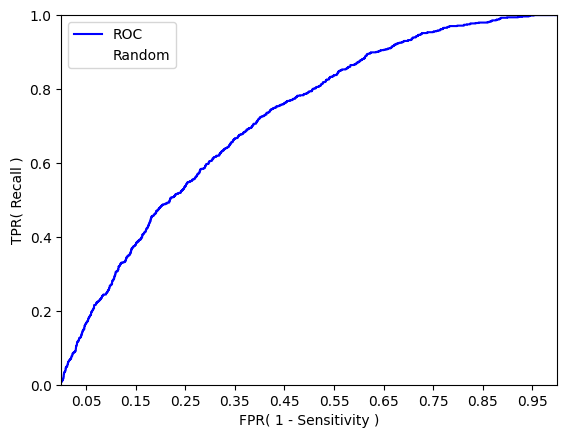

In [43]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # return false positive rate & true positive rate
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # plot ROC Curve
    plt.plot(fprs , tprs, label='ROC', color = 'blue')
    # plot random curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='white')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
roc_curve_plot(y_test, y_pred_test_proba)

### Indicate Features
---

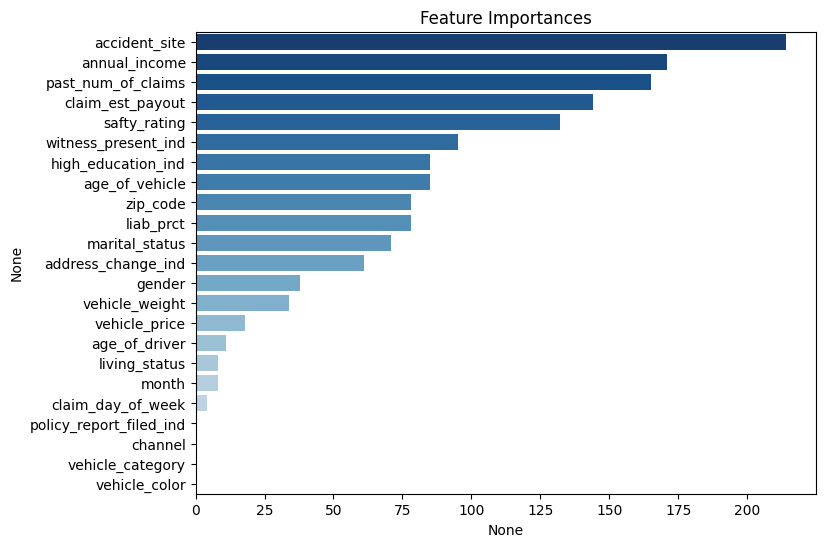

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

cmap = plt.cm.Blues 
colors = cmap(np.linspace(0.95, 0.15, len(ftr_top20)))

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette=colors, edgecolor='none')
plt.show()

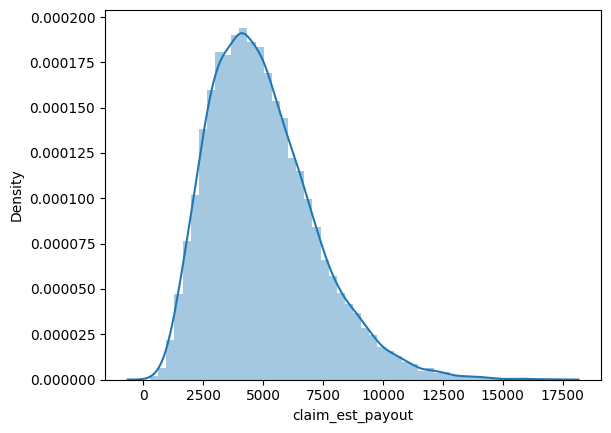

In [45]:
sns.distplot(df['claim_est_payout']);

In [46]:
# segmentation
df['claim_est_payout_gp'] = np.where (df['claim_est_payout'] <= 2500, 1,
                           np.where(df['claim_est_payout'] <= 7500, 2, 3))

df[['claim_est_payout','claim_est_payout_gp']]

,claim_est_payout,claim_est_payout_gp
0,7530.940993,3
1,2966.024895,2
2,6283.888333,2
3,6169.747994,2
4,4541.387150,2
...,...,...
17993,4806.841803,2
17994,4089.794471,2
17995,2225.803056,1
17996,9560.744844,3


In [47]:
df.groupby(['claim_est_payout_gp', 'fraud'])['fraud'].count()

claim_est_payout_gp  fraud
1                    0         1588
                     1          404
2                    0        11703
                     1         1998
3                    0         1870
                     1          410
Name: fraud, dtype: int64

In [48]:
# lower claim_est_payout tends to yield higher fraud case
print("gp1 :", 404 / (404+1588))
print("gp2 :", 1998 / (1998+11703))
print("gp3 :", 410 / (410+1870))

gp1 : 0.20281124497991967
gp2 : 0.14582877162250932
gp3 : 0.17982456140350878


### Save and Read Model
---

In [49]:
import pickle
saved_model = pickle.dumps(clf)
clf_from_pickle = pickle.loads(saved_model)

### Visualization
---

Saving figure pr_curve


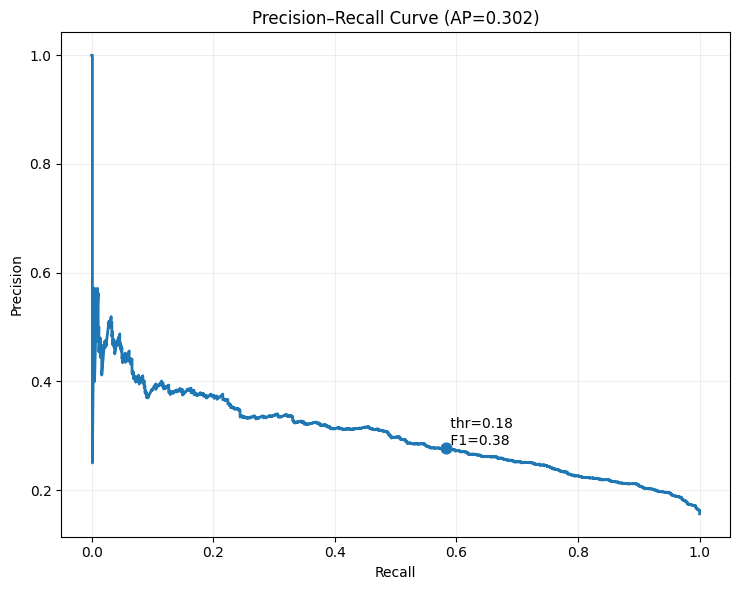

In [52]:
# Precision–Recall Curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.style.use('default')

prec, rec, thr = precision_recall_curve(y_test, y_pred_test_proba)
ap = average_precision_score(y_test, y_pred_test_proba)

f1 = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.argmax(f1)
best_thr = thr[best_idx]

plt.figure(figsize=(7.5,6))
plt.plot(rec, prec, lw=2)
plt.scatter(rec[best_idx], prec[best_idx], s=60)
plt.text(rec[best_idx], prec[best_idx],
         f" thr={best_thr:.2f}\n F1={f1[best_idx]:.2f}",
         ha='left', va='bottom')

plt.title(f'Precision–Recall Curve (AP={ap:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.grid(alpha=0.2)

save_fig('pr_curve')
plt.show()


Saving figure gain_curve


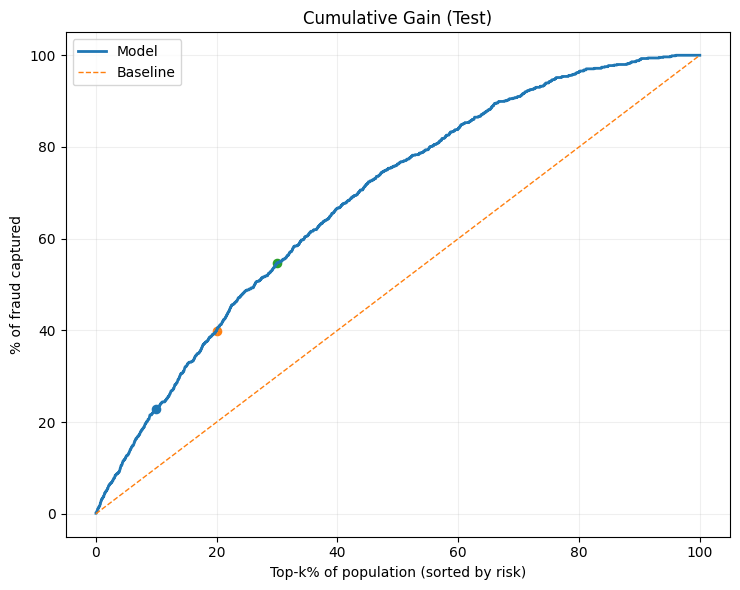

In [53]:
# Top-k capture curve (cumulative gain)

import numpy as np
import matplotlib.pyplot as plt

order = np.argsort(-y_pred_test_proba)
y_true_sorted = np.array(y_test)[order]

cum_fraud = np.cumsum(y_true_sorted)
total_fraud = cum_fraud[-1] if cum_fraud.size else 1
capture_rate = cum_fraud / total_fraud

population = np.arange(1, len(y_true_sorted)+1) / len(y_true_sorted)

plt.figure(figsize=(7.5,6))
plt.plot(population*100, capture_rate*100, lw=2, label='Model')
plt.plot([0,100],[0,100], '--', lw=1, label='Baseline')

for k in [10,20,30]:
    idx = int(len(population)*k/100)
    plt.scatter(k, capture_rate[idx]*100, s=35)

plt.xlabel('Top-k% of population (sorted by risk)')
plt.ylabel('% of fraud captured')
plt.title('Cumulative Gain (Test)')
plt.legend()
plt.grid(alpha=0.2)

save_fig('gain_curve')
plt.show()
